<a href="https://colab.research.google.com/github/yohanesnuwara/python-bootcamp-for-geoengineers/blob/master/PioPetro/piopetro_session4_decline_curve_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Get DCA utility
!wget https://raw.githubusercontent.com/yohanesnuwara/pyreservoir/master/dca/dca.py

--2021-03-02 02:59:51--  https://raw.githubusercontent.com/yohanesnuwara/pyreservoir/master/dca/dca.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7857 (7.7K) [text/plain]
Saving to: ‘dca.py’

dca.py              100%[===================>]   7.67K  --.-KB/s    in 0s      

2021-03-02 02:59:51 (85.2 MB/s) - ‘dca.py’ saved [7857/7857]



In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

from dca import remove_outlier, arps_fit

In [3]:
# Production data link (same as session 2)
path = "http://bit.ly/piopetro-data1"

In [4]:
# Read data
df = pd.read_csv(path)

df.head()

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,07-Apr-14,15/9-F-1 C,0.0,0.000,0.000,0.000,0.0,0.00000,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
1,08-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,1.00306,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
2,09-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.97901,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
3,10-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.54576,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
4,11-Apr-14,15/9-F-1 C,0.0,310.376,96.876,277.278,0.0,1.21599,33.098,10.48,33.072,0.0,0.0,0.0,NaN,production


In [5]:
# Convert date column to pandas datetime format
df["DATEPRD"] = pd.to_datetime(df["DATEPRD"], format="%d-%b-%y")

df.head()

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,2014-04-07,15/9-F-1 C,0.0,0.000,0.000,0.000,0.0,0.00000,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
1,2014-04-08,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,1.00306,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
2,2014-04-09,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.97901,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
3,2014-04-10,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.54576,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
4,2014-04-11,15/9-F-1 C,0.0,310.376,96.876,277.278,0.0,1.21599,33.098,10.48,33.072,0.0,0.0,0.0,NaN,production


In [6]:
# Select well 15/9-F-14 (Don't forget to reset index)
df = df[df["NPD_WELL_BORE_NAME"]=="15/9-F-14"].reset_index()

# Dataframe only has 2 columns of interest: time and rate
df = df[["DATEPRD", "BORE_OIL_VOL"]]

df.head()

,DATEPRD,BORE_OIL_VOL
0,2008-02-12,0.0
1,2008-02-13,0.0
2,2008-02-14,0.0
3,2008-02-15,0.0
4,2008-02-16,0.0


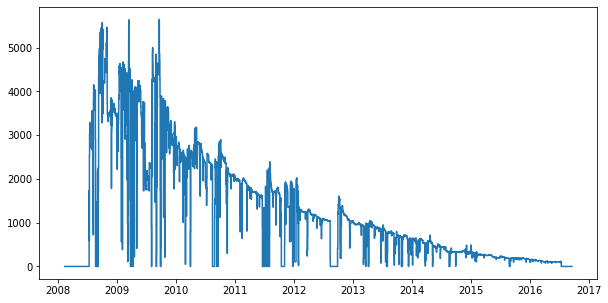

In [7]:
# Plot oil production rate
plt.figure(figsize=(10,5))
plt.step(df["DATEPRD"], df["BORE_OIL_VOL"])
plt.show()

In [8]:
# Removing outliers (window=150, num_stdev=50)
df2 = remove_outlier(df, "BORE_OIL_VOL", 50, 50, trim=True)

df2.head()

,DATEPRD,BORE_OIL_VOL,BORE_OIL_VOL_rol_Av,BORE_OIL_VOL_rol_Std,BORE_OIL_VOL_is_Outlier
0,2008-11-01,4645.0,4016.40,593.445732,False
1,2008-11-02,3732.0,4009.00,593.123727,False
2,2008-11-03,3476.0,4001.48,592.919798,False
3,2008-11-04,3461.0,3953.06,670.047802,False
4,2008-11-05,3458.0,3930.94,679.680219,False


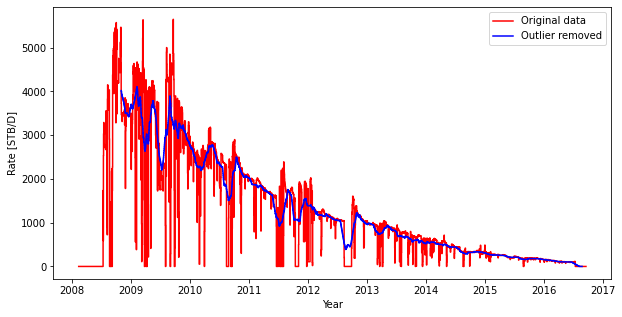

In [9]:
# Plot outlier-removed oil production rate, compare w/ original
plt.figure(figsize=(10,5))

plt.step(df["DATEPRD"], df["BORE_OIL_VOL"], color="red", label="Original data")
plt.step(df2["DATEPRD"], df2["BORE_OIL_VOL_rol_Av"], color="blue", label="Outlier removed")
plt.xlabel("Year"); plt.ylabel("Rate [STB/D]")

plt.legend()
plt.show()

In [10]:
# Define time and production rate (from outlier-removed dataframe)
t = df2["DATEPRD"]
q = df2["BORE_OIL_VOL_rol_Av"]

Initial production rate (qi)  : 3835.95682 VOL/D
Initial decline rate (di)     : 0.00080 VOL/D
Decline coefficient (b)       : -0.28729
RMSE of regression            : 0.00753


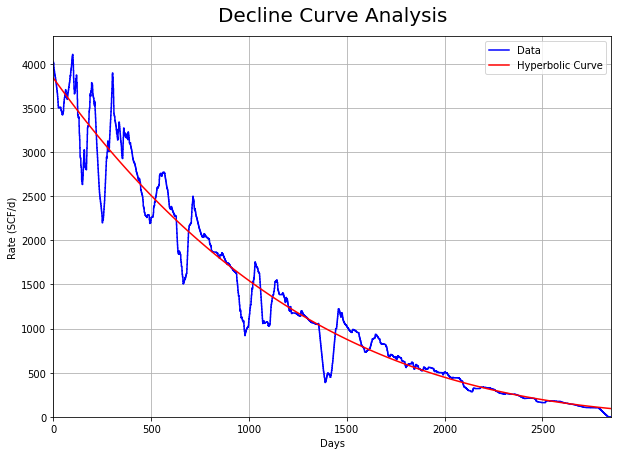

(3835.956818560814,
 0.0008015095854182389,
 -0.2872863626589032,
 0.007526803769319763)

In [14]:
# Decline curve analysis
arps_fit(t, q, plot=True)

In [13]:
# x = np.array([-0.5, -0.25, -1, 0, 1, 0.25, 0.5])

# def f(x, a, b, c):
#   return (a*x**2) + (b*x) + c

# y = f(x, 0.5, 0.8, 10)
# noise = np.random.random(7) * 0.1
# y = np.round((y+noise), 2)

# [a,b,c], pcov = curve_fit(f, x, y)
# print(a, b, c)

# plt.scatter(x,y)
# plt.show()